<a href="https://colab.research.google.com/github/Mounika-Alwar/Employee-Promotion-Detection/blob/main/InnoHacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

The provided dataset consists of 13 features and contains a total of 54,808 samples. The objective is to predict whether an employee will be promoted based on various employee-specific details. This predictive task involves analyzing the given features and leveraging suitable machine learning algorithms to build an accurate and robust model for classification.

# Process:
1. **Data Import**


2. **Exploratory Data Analysis** \\

   a. Handling Null Values \\
      (i) Handling Null Values in 'education' Column \\
      (ii) Handling Null Values in 'previous_year_rating' Column \\

   b. Duplicates Check \\

   c. Handling Outliers \\
      (i) Handling Outliers in 'no_of_trainings' Column \\
      (ii) Handling Outliers in 'length_of_service' Column \\


3. **Data Visualization** \\


4. **Feature Engineering** \\

   a. Created a Column named 'training_effectiveness' \\
   b. Created a Column named 'award_boost'


5. **Handling Categorical Variables** \\

   a. One-hot encoding for department, region and recruitment_channel \\
   b. Label encoding for education and gender


6. **Resampling the data**

7. **Model Building**

   a. Logistic Regression \\
   b. Linear SVC \\
   c. K-Nearest Neighbors \\
   d. Random Forest \\
   e. Gradient Boosting Classifier

8. **Hyperparameter Tuning for Gradient Boosting Classifier**


9. **Feature Importance**


10. **Conclusion**






# Data Import

In [ ]:
!pip install gspread pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1fU0ccNC6rBvAlcnBgm_rj3IzECgBW_rrDk3pdQEzVMQ/export?format=csv&gid=917652076'
df = pd.read_csv(sheet_url)

df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


# Exploratory Data Analysis

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
df.shape

(54808, 13)

In [ ]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


## a. Handling Null Values:
### (i) Handling null values in 'education' Column

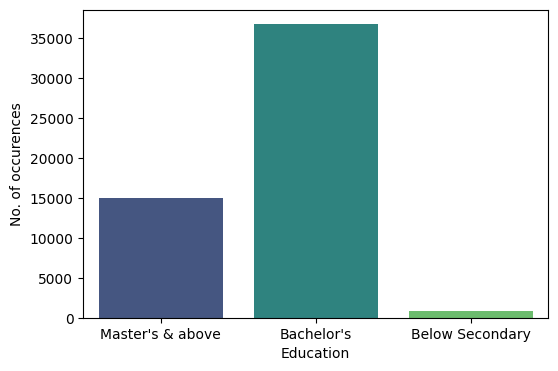

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='education', palette='viridis')
plt.xlabel("Education")
plt.ylabel("No. of occurences")
plt.show()

Most of the Values in Education column are 'Bachelor's Education'

In [ ]:
df[df['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47,0


In [ ]:
df.education.value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


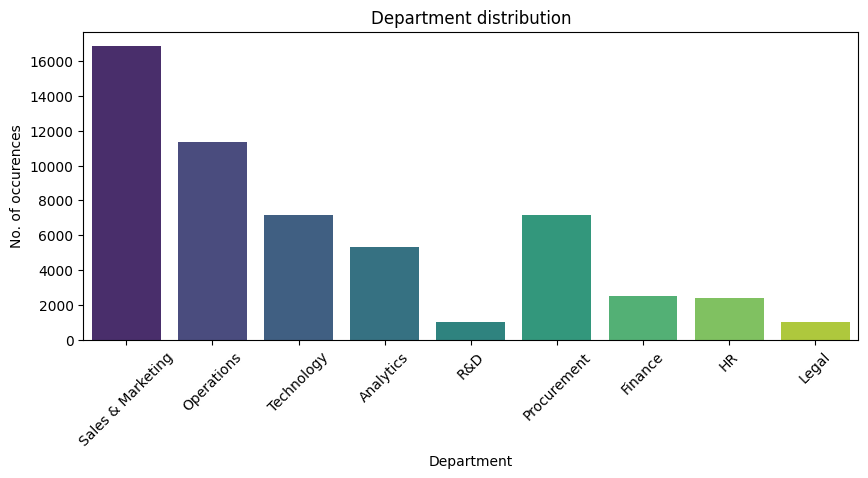

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='department', palette='viridis')
plt.xlabel("Department")
plt.ylabel("No. of occurences")
plt.title("Department distribution")
plt.xticks(rotation=45)
plt.show()

Cross tabbing Department and Education to check for *Correlation* between them

In [ ]:
dept_edu = pd.crosstab(df['department'],df['education'])
dept_edu

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,3978,0,1037
Finance,1895,106,499
HR,1525,128,733
Legal,814,65,156
Operations,7781,176,3165
Procurement,4393,129,2544
R&D,542,0,429
Sales & Marketing,11099,0,4166
Technology,4642,201,2196


We can see that, Below Secondary are never in Analytics, R&D and Sales & Marketing

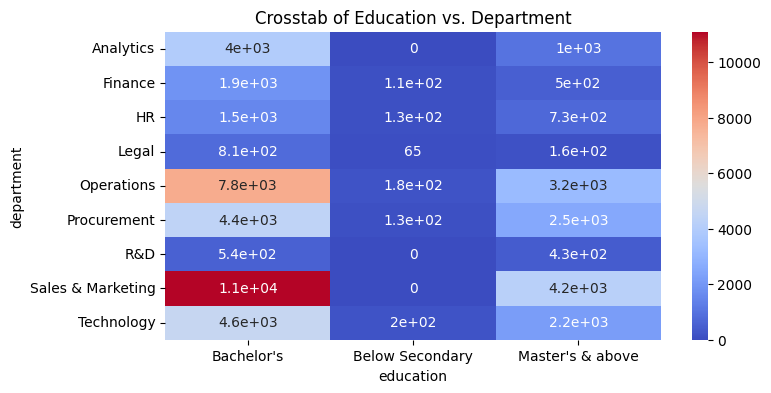

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(dept_edu, annot=True, cmap='coolwarm')
plt.title('Crosstab of Education vs. Department')
plt.show()

We can see that 'Sales&Marketing' highly correlates with 'Bachelor's' of education column

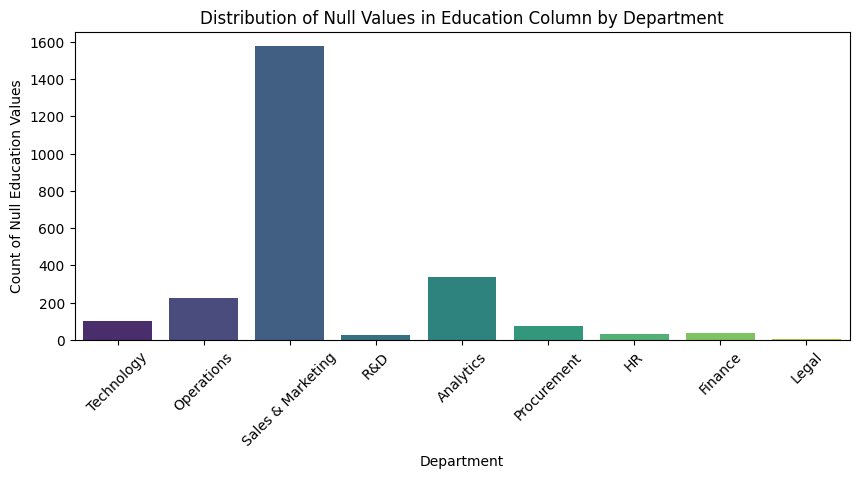

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df[df['education'].isnull()], x='department', palette='viridis')
plt.title('Distribution of Null Values in Education Column by Department')
plt.xlabel('Department')
plt.ylabel('Count of Null Education Values')
plt.xticks(rotation=45)
plt.show()

Encoding null values of Education with most frequent value i.e Bachelor's, \\
We can also see that Each department also comparitively highly correlates with Bachelor's.

In [ ]:
df_new = df.copy()

In [ ]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [ ]:
df_new['education'].fillna("Bachelor's", inplace=True)

In [ ]:
df_new.education.isnull().sum()

0

### (ii) Handling null values in 'previous_year_rating' Column

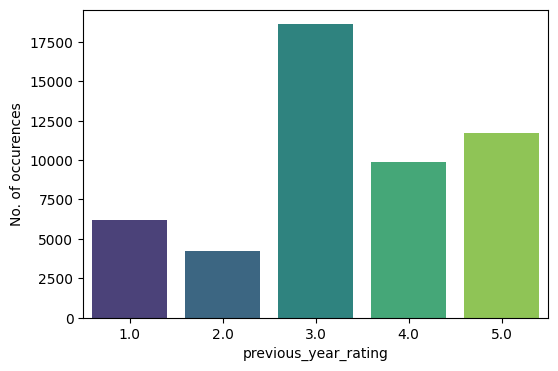

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='previous_year_rating', palette='viridis')
plt.xlabel("previous_year_rating")
plt.ylabel("No. of occurences")
plt.show()

In [ ]:
df_new[df_new['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


In [ ]:
df_new[(df_new['length_of_service']==1) & (df_new['previous_year_rating'].isnull())]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


We can see that, all null values in 'previous_year_rating' column correspond to 'length_of_service' to 1. \\
As they dont have any previous year service, they are considered as null. \\
So encoding these null values with '0'

In [ ]:
df_new['previous_year_rating'].fillna(0, inplace=True)

In [ ]:
df_new.previous_year_rating.isnull().sum()

0

In [ ]:
df_new.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


## b. Duplicates Check

In [ ]:
df_new.duplicated().sum()

0

There are no Duplicates in the dataset

## c. Handling Outliers

In [ ]:
num_cols = ['previous_year_rating','no_of_trainings','length_of_service','avg_training_score']

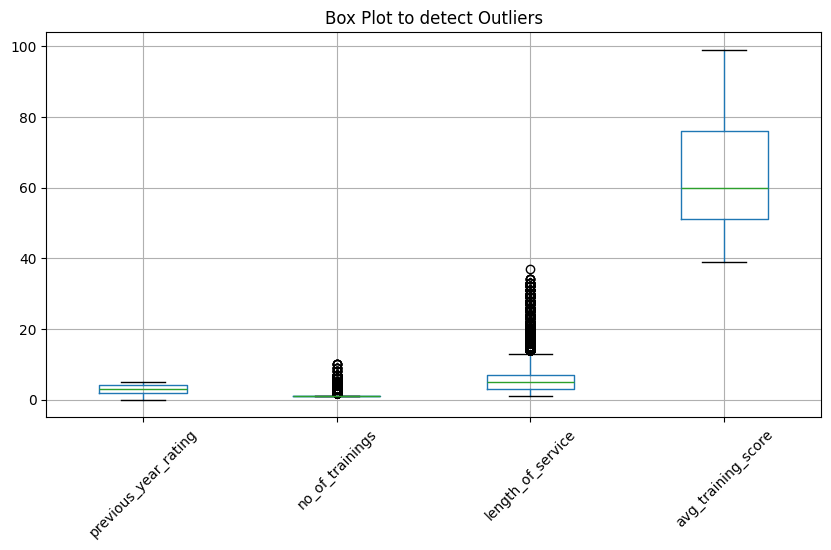

In [ ]:
plt.figure(figsize = (10,5))
df_new[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot to detect Outliers')
plt.show()

Outliers are observed in 'no_of_trainings' and 'length_of_service'

### (i) Handling Outliers in 'no_of_trainings' Column

In [ ]:
z_score = np.abs(stats.zscore(df_new[num_cols]))
outliers = (z_score>3).sum()
print("Outliers per column:\n",outliers)

Outliers per column:
 previous_year_rating      0
no_of_trainings         667
length_of_service       975
avg_training_score        0
dtype: int64


In [ ]:
fig = px.box(df_new, y='no_of_trainings',points='outliers',title='Outliers in no_of_trainings')
fig.update_layout(hovermode='x')
fig.show()

In [ ]:
def cap_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  df[column] = np.where(df[column]<lower_bound,lower_bound,df[column])
  df[column] = np.where(df[column]>upper_bound,upper_bound,df[column])
  return df

Function to Cap Outliers using 'z_score'

In [ ]:
df_clean = cap_outliers(df_new,'no_of_trainings')

In [ ]:
z_score = np.abs(stats.zscore(df_clean[num_cols]))
outliers = (z_score>3).sum()
print("Outliers per column:\n",outliers)

Outliers per column:
 previous_year_rating      0
no_of_trainings           0
length_of_service       975
avg_training_score        0
dtype: int64


### (ii) Handling Outliers in 'length_of_service' Column

In [ ]:
fig = px.box(df_clean, y='length_of_service',points='outliers',title='Outliers in length_of_service')
fig.update_layout(hovermode='x')
fig.show()

In [ ]:
df_clean = cap_outliers(df_new,'length_of_service')

In [ ]:
z_score = np.abs(stats.zscore(df_clean[num_cols]))
outliers = (z_score>3).sum()
print("Outliers per column:\n",outliers)

Outliers per column:
 previous_year_rating    0
no_of_trainings         0
length_of_service       0
avg_training_score      0
dtype: int64


# 3. Data Visualization

In [ ]:
fig = px.histogram(
    df_clean,
    x='is_promoted',
    facet_col='gender',
    color='is_promoted',
    marginal='rug',
    title = 'Promotion based on Gender'
)

fig.show()


We observe that, most of the people who got promoted are majorly male. (Skewed Distribution)

In [ ]:
px.histogram(df_clean,'age',color = 'education',facet_col = 'education',barmode='group')

# 4. Feature Engineering

### a. Created a Column named 'training_effectiveness'

In [ ]:
df_clean['training_effectivenss'] = df_clean['no_of_trainings'] * df_clean['avg_training_score']

### b. Created a Column named 'award_boost'

In [ ]:
df_clean['award_boost'] = df_clean['awards_won?'] * df_clean['previous_year_rating']

In [ ]:
df_clean.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,training_effectivenss,award_boost
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8.0,0,49,0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4.0,0,60,0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7.0,0,50,0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,1.0,39,1.0,10.0,0,50,0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2.0,0,73,0,73.0,0.0


## 5. Handling Categorical Variables

In [ ]:
print("Value counts of all object datatypes")
print("Value counts of department:")
print(df['department'].value_counts())
print()
print("Value counts of region:")
print(df['region'].value_counts())
print()
print("Value counts of education:")
print(df['education'].value_counts())
print()
print("Value counts of gender:")
print(df['gender'].value_counts())
print()
print("Value counts of recruitment_channel:")
print(df['recruitment_channel'].value_counts())
print()

Value counts of all object datatypes
Value counts of department:
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

Value counts of region:
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      

### a. One-hot encoding for department, region and recruitment_channel
Using One-hot encoding for these, because they dont have any order.

In [ ]:
encoded_df = pd.get_dummies(df_clean, columns=['department', 'region', 'recruitment_channel'])

encoded_columns = encoded_df.columns.difference(df_new.columns)
encoded_df[encoded_columns] = encoded_df[encoded_columns].astype(int)

encoded_df.head()

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,Master's & above,f,1.0,35,5.0,8.0,0,49,0,...,0,0,0,0,1,0,0,0,0,1
1,65141,Bachelor's,m,1.0,30,5.0,4.0,0,60,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,Bachelor's,m,1.0,34,3.0,7.0,0,50,0,...,0,0,0,0,0,0,0,0,0,1
3,2542,Bachelor's,m,1.0,39,1.0,10.0,0,50,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,Bachelor's,m,1.0,45,3.0,2.0,0,73,0,...,0,0,0,0,0,0,0,1,0,0


### b. Label encoding for education and gender
Using label encoding for education and gender because education has an order, and gender can be of any order (One-hot can also be used)

In [ ]:
education_mapping ={'Bachelor\'s': 1, 'Master\'s & above': 2, 'Below Secondary': 0}
encoded_df['education'] = encoded_df['education'].map(education_mapping)

In [ ]:
gender_mapping ={'m': 1, 'f': 0}
encoded_df['gender'] = encoded_df['gender'].map(gender_mapping)

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   education                     54808 non-null  int64  
 2   gender                        54808 non-null  int64  
 3   no_of_trainings               54808 non-null  float64
 4   age                           54808 non-null  int64  
 5   previous_year_rating          54808 non-null  float64
 6   length_of_service             54808 non-null  float64
 7   awards_won?                   54808 non-null  int64  
 8   avg_training_score            54808 non-null  int64  
 9   is_promoted                   54808 non-null  int64  
 10  training_effectivenss         54808 non-null  float64
 11  award_boost                   54808 non-null  float64
 12  department_Analytics          54808 non-null  int64  
 13  d

In [ ]:
columns_to_convert = ['no_of_trainings', 'previous_year_rating', 'length_of_service','training_effectivenss','award_boost']  # Replace with your column names

for col in columns_to_convert:
    encoded_df[col] = encoded_df[col].astype('int64')

print(encoded_df.dtypes)

employee_id                     int64
education                       int64
gender                          int64
no_of_trainings                 int64
age                             int64
previous_year_rating            int64
length_of_service               int64
awards_won?                     int64
avg_training_score              int64
is_promoted                     int64
training_effectivenss           int64
award_boost                     int64
department_Analytics            int64
department_Finance              int64
department_HR                   int64
department_Legal                int64
department_Operations           int64
department_Procurement          int64
department_R&D                  int64
department_Sales & Marketing    int64
department_Technology           int64
region_region_1                 int64
region_region_10                int64
region_region_11                int64
region_region_12                int64
region_region_13                int64
region_regio

# 6. Resampling the data

In [ ]:
y__df=pd.DataFrame(y_train,columns=['is_promoted'])
fig = px.histogram(y__df,x='is_promoted',color='is_promoted',title='Original Data Distribution')
fig.show()

Data is so imbalanced.

In [ ]:
x_train = encoded_df.drop('is_promoted', axis=1)
y_train = encoded_df['is_promoted']

Used RandomOverSampler for Over Sampling

In [ ]:
ros = RandomOverSampler(sampling_strategy = 'auto',random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [ ]:
y_resampled_df=pd.DataFrame(y_train_resampled,columns=['is_promoted'])

In [ ]:
fig = px.histogram(y_resampled_df,x='is_promoted',color='is_promoted',title='Resampled Data Distribution')
fig.show()

In [ ]:
encoded_df.shape

(54808, 58)

In [ ]:
x_train_resampled.shape

(100280, 57)

In [ ]:
y_train_resampled.shape

(100280,)

In [ ]:
y_train_resampled.value_counts()

,count
is_promoted,
0,50140
1,50140


In [ ]:
x_train_resampled.head()

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,training_effectivenss,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,2,0,1,35,5,8,0,49,49,...,0,0,0,0,1,0,0,0,0,1
1,65141,1,1,1,30,5,4,0,60,60,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,1,1,34,3,7,0,50,50,...,0,0,0,0,0,0,0,0,0,1
3,2542,1,1,1,39,1,10,0,50,50,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,1,1,45,3,2,0,73,73,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train_resampled.describe()

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,training_effectivenss,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
count,100280.000000,100280.000000,100280.000000,100280.0,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,...,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.000000,100280.00000,100280.000000
mean,39190.696899,1.278400,0.694456,1.0,34.598863,3.360660,5.525479,0.067162,67.004079,67.004079,...,0.003859,0.040437,0.011318,0.009972,0.098644,0.011976,0.004876,0.552244,0.02486,0.422896
std,22668.141787,0.479744,0.460640,0.0,7.396863,1.508192,3.374120,0.250304,14.549786,14.549786,...,0.062003,0.196982,0.105784,0.099362,0.298185,0.108780,0.069661,0.497266,0.15570,0.494022
min,1.000000,0.000000,0.000000,1.0,20.000000,0.000000,1.000000,0.000000,39.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,19437.000000,1.000000,0.000000,1.0,29.000000,3.000000,3.000000,0.000000,54.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,39326.000000,1.000000,1.000000,1.0,33.000000,3.000000,5.000000,0.000000,64.000000,64.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
75%,58880.000000,2.000000,1.000000,1.0,38.000000,5.000000,7.000000,0.000000,80.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
max,78298.000000,2.000000,1.000000,1.0,60.000000,5.000000,13.000000,1.000000,99.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# 7. Model Building

In [ ]:
x_train,x_dev,y_train,y_dev = train_test_split(x_train_resampled,y_train_resampled,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((80224, 57), (80224,))

In [ ]:
x_dev.shape,y_dev.shape

((20056, 57), (20056,))

## a. Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_reg_pred = log_reg.predict(x_dev)

In [ ]:
log_reg_acc = accuracy_score(y_dev,log_reg_pred)
print("Logistic Regresssion accuracy: ",log_reg_acc)

Logistic Regresssion accuracy:  0.6221080973274831


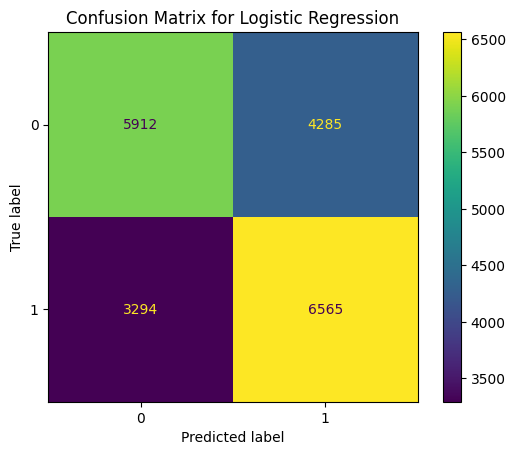

In [ ]:
cm = confusion_matrix(y_dev, log_reg_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Replace labels with your classes
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")

plt.show()

## b. Linear SVC

In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = svc.predict(x_dev)

In [ ]:
svc_acc = accuracy_score(y_dev,svc_pred)
print("LinearSVC accuracy: ",svc_acc)

LinearSVC accuracy:  0.7173414439569207


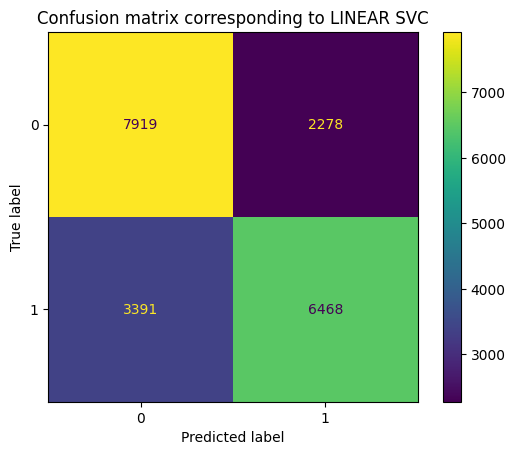

In [ ]:
cm = confusion_matrix(y_dev, svc_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Replace labels with your classes
disp.plot()
plt.title("Confusion matrix corresponding to LINEAR SVC")
plt.show()

### c. K-Nearest Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_dev)

In [ ]:
print("KNN Accuracy:", accuracy_score(y_dev, knn_pred))

KNN Accuracy: 0.8688671719186278


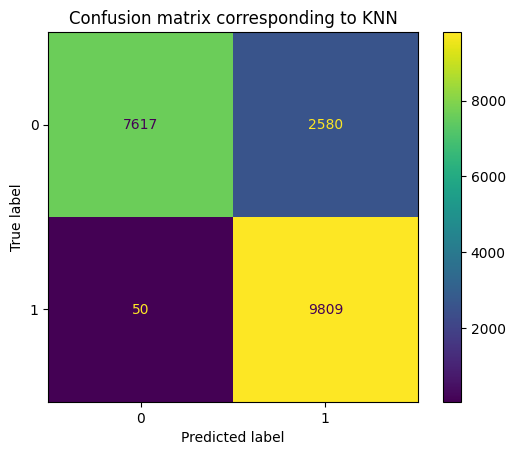

In [ ]:
cm = confusion_matrix(y_dev, knn_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Replace labels with your classes
disp.plot()
plt.title("Confusion matrix corresponding to KNN")
plt.show()

### d. Random Forest

In [ ]:
rdm_frt = RandomForestClassifier(n_estimators=100, random_state=42)
rdm_frt.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rdm_frt_pred = rdm_frt.predict(x_dev)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_dev, rdm_frt_pred))

Random Forest Accuracy: 0.992171918627842


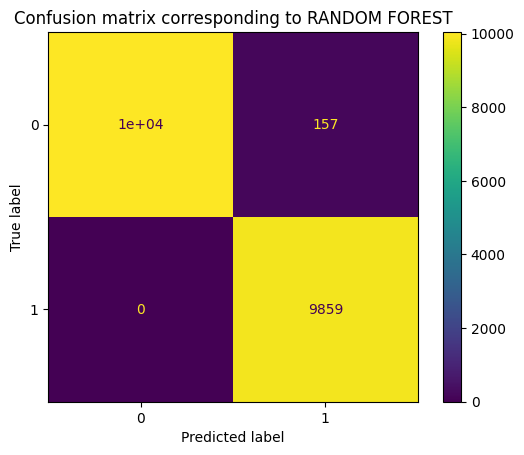

In [ ]:
cm = confusion_matrix(y_dev, rdm_frt_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Replace labels with your classes
disp.plot()
plt.title("Confusion matrix corresponding to RANDOM FOREST")
plt.show()

### e. Gradient Boosting Classifier

In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_clf_proba = xgb_clf.predict_proba(x_dev)[:, 1]  # Probabilities for the positive class
threshold = 0.5  # Try a higher threshold
xgb_clf_pred = (xgb_clf_proba > threshold).astype(int)

In [ ]:
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_dev, xgb_clf_pred))

Gradient Boosting Classifier Accuracy: 0.8381531711208616


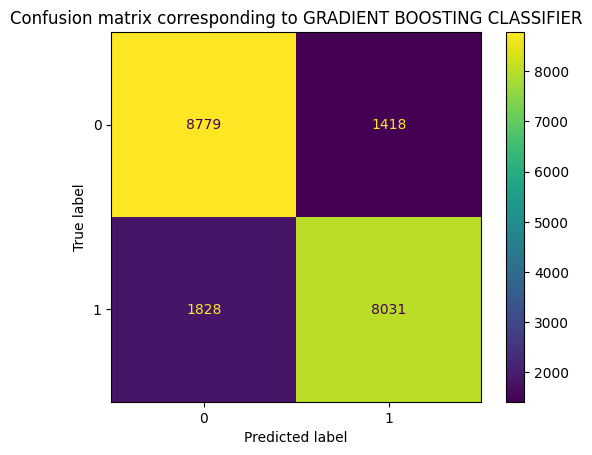

In [ ]:
cm = confusion_matrix(y_dev, xgb_clf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion matrix corresponding to GRADIENT BOOSTING CLASSIFIER")
plt.show()

Accuracy for Logistic Regression: 0.62 \\
Accuracy for LinearSVC: 0.71 \\
Accuracy for K-Neighbors Classifer: 0.86 \\
Accuracy for Random Forest: 0.99 \\
Accuracy for Gradient Boosting Classfier: 0.83

Based on all confusion matrices of all models, Gradient Boosting seems approachable, so tuning it further.

# 8. Hyperparameter Tuning for Gradient Boosting Classifier

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'subsample': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2}


In [ ]:
rs_pred = best_model.predict(x_dev)

accuracy = accuracy_score(y_dev, rs_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9749202233745513


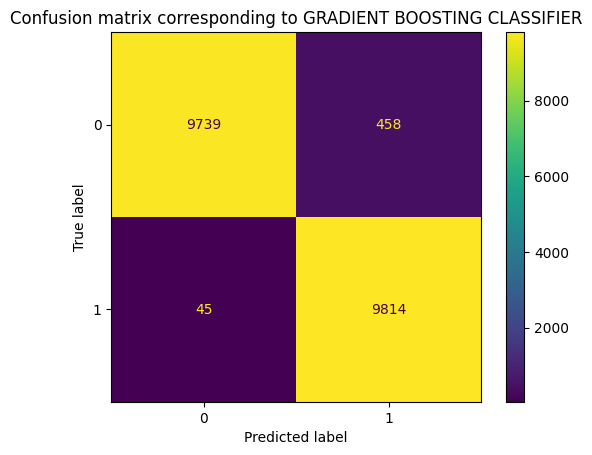

In [ ]:
cm = confusion_matrix(y_dev, rs_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion matrix corresponding to GRADIENT BOOSTING CLASSIFIER")
import matplotlib.pyplot as plt
plt.show()


# 9. Feature Importance

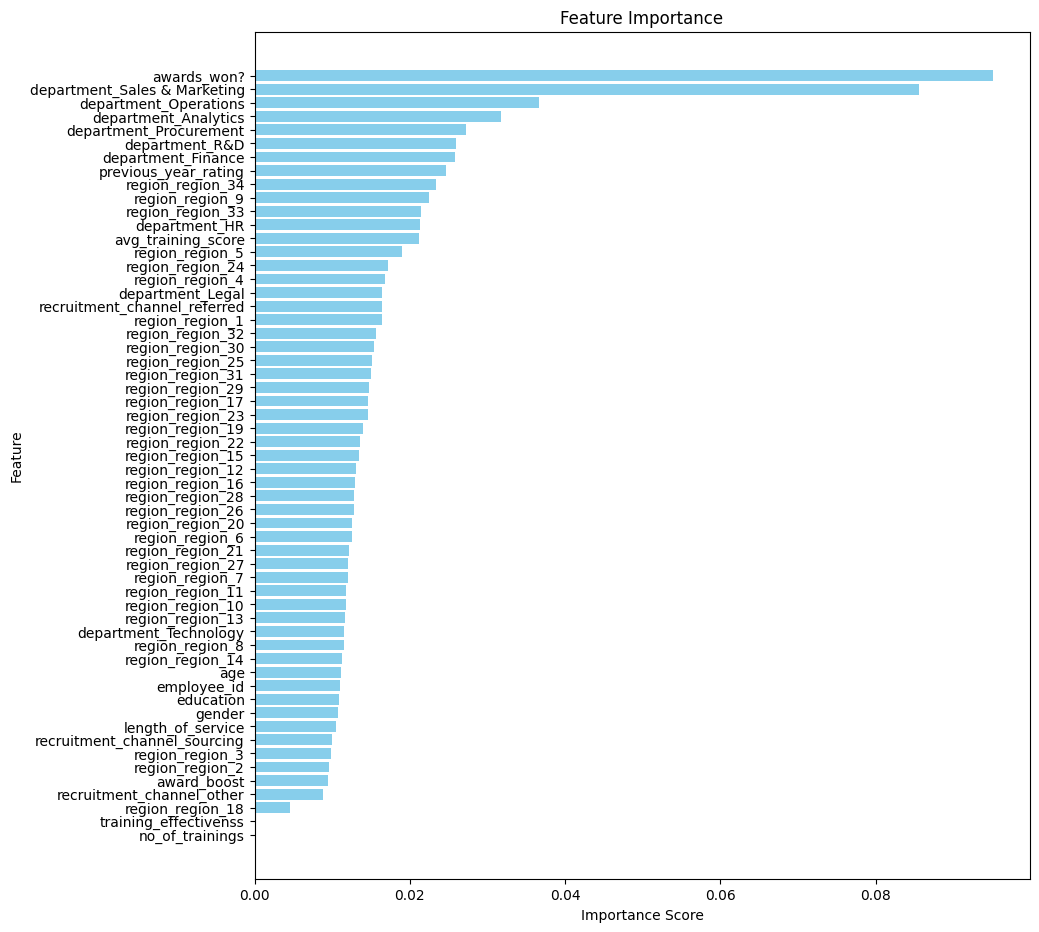

In [ ]:
feature_importance = best_model.feature_importances_

importance_df = pd.DataFrame({"Feature": x_train.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 11))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

From the above plot, we can say that features 'awards_won?' and 'department_Sales&Marketing' have more Feature Importance.

# 10. Conclusions

Predicted whether an employee is promoted or not. \\
Final model used is Gradient Boosting Classifier, which got tuned using RandomSearch CV to attain an acccuracy of 97%.